# Clustering Tutorial Activity

Clustering is a broad set of *unsupervised learning* techniques used to find subgroups within a dataset. The goal of the clustering algorithm is to split up the data so that points within a single cluster are very similar and points in different clusters are different. We can ask questions such as "Is there an informative way to visualize the data?" or "Can we discover subgroups among the variables or among the observations?". The most popular clustering methods include *k*-Means clustering and hierarchical clustering. *K*-Means clustering seeks to partition the observations into pre-specified number of clusters. Hierarchical clustering is a bottom-up approach seeking to build a hierarchy of clusters

After completing this tutorial you should be able to:
- conceptually understand the k-means clustering algorithm <br/>
- use `sci-kit learn` to perform k-means clustering and hierarchical clustering <br/>
- use `matplotlib` visualize the results from k-means clustering and hierarchical clustering
- make justified decisions on how many optimal clusters exist in the dataset
- understand the impact of noisy data on clustering algorithms
- understand the benefits and limitations to modeling data after reducing features by clustering


## Further reading
 1. Github is a great resource! Introduction to Machine Learning with Python by Andreas Muller & Sarah Guido can be found [here](https://github.com/amueller/introduction_to_ml_with_python).
 2. Other readings that the MSU Machine Learning Group has used can be found [here](https://drive.google.com/drive/u/0/folders/1F2hcSpIa_jWyVCVS51oEO1dXzWP_kOu2).

## Data

In the data folder, you will find a few different data sets. To conceptually understand the cluster algorithms you will use the `sample_algorthm.csv` dataset. For the second part of the tutorial, you will use the `sample_5features.csv` dataset. The "Challenges" at the end of the tutorial will utilize th `sample_challenge.csv`dataset.

## K-Means Clustering

*K*-means clustering is a simple approach for partitioning a data set into *K* distinct, non-overlappying clusters. To perform *k*-means clustering, the researcher must specify the desired number of clusters before running the algorithm. There are alternative approaches to clustering which does not require that you commit to a particular number of clusters. We will explore this later but for now, let's focus on *k*-means clustering.

### Task 1: Conceptually understanding the *k*-means clustering algorithm
1. Import the `sample_algorithm.csv` file and visualize the data using `plt.plot` used in the previous tutorials. This dataset has only 2 features so a simple 2-D plot will work. Does this dataset appear to have a clustering structure? If so, how many clusters do you think are in the dataset?
2. It looks as though there might be 3 clusters in the data. Choose three random points in the x-y plane to be used as the initial centers. Plot them on the previous graph as an 'X'. *Note: Each center needs to be initialized at differnt point in space.*
3. Define three new "distance" columns in the dataset to calculate the distances between each of the three centroids and each observation. The most common distance metric used in a clustering analysis is the Euclidean distance. Below is a function already written for you to use.
```python
def calculate_distance(initial, X, Y):
    distances = []
    c_x, c_y = initial
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
    return distances
```
4. For each observation, compare the three distances and chose the *smallest* one (use [`np.argmin`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html).) Using the `map` function, label the centroids accordingly in a new column called "Clusters".
5. Find the new centroid points by taking the means for both features of each of the three clusters. Make a new plot of the data, coloring the three clusters and labeling the new centroids as 'D'. What happened to the three centroids as a result of this algorithm?
6. Make the new centroid points as the 'initial' centroids. Repeat steps 3-5 for a second iteration. What happened to the three centroids after this second iteration? When do we know the algorithm is complete and we have our defined clusters?



In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('data/sample_algorithm.csv')
df1.head()

,Object,feature_1,feature_2
0,Object 1,-0.807236,2.669463
1,Object 2,1.926358,4.152430
2,Object 3,-1.500166,3.101333
3,Object 4,-1.109050,2.877864
4,Object 5,-2.531227,1.919691


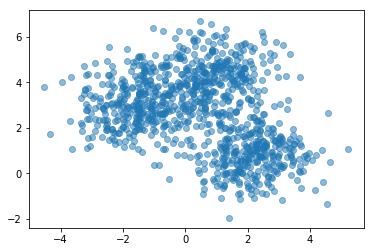

In [3]:
# Plot the data and visualize how many clusters exist
plt.scatter(df1['feature_1'],df1['feature_2'], alpha=0.5);

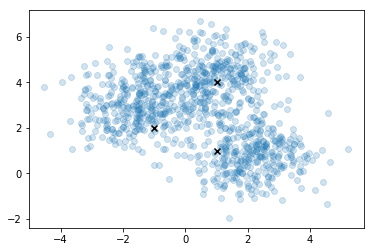

In [4]:
# Initialize the centers and plot them on the previous plot
c1 = (1,1)
c2 = (-1,2)
c3 = (1,4)
initial = pd.DataFrame([c1,c2,c3], columns=['feature_1','feature_2'])
plt.scatter(df1['feature_1'], df1['feature_2'], alpha=0.2);
plt.scatter(initial['feature_1'], initial['feature_2'], marker='x', c='black');

In [5]:
# Use the distance calculation and add them to dataframe
def calculate_distance(initial, X, Y):
 distances = []
 c_x, c_y = initial
 for x, y in list(zip(X, Y)):
     root_diff_x = (x - c_x) ** 2
     root_diff_y = (y - c_y) ** 2
     distance = np.sqrt(root_diff_x + root_diff_y)
     distances.append(distance)
 return distances

df1['c1_dist_1'] = calculate_distance(c1, df1.feature_1, df1.feature_2)
df1['c2_dist_1'] = calculate_distance(c2, df1.feature_1, df1.feature_2)
df1['c3_dist_1'] = calculate_distance(c3, df1.feature_1, df1.feature_2)

print(df1.head())

     Object  feature_1  feature_2  c1_dist_1  c2_dist_1  c3_dist_1
0  Object 1  -0.807236   2.669463   2.460327   0.696663   2.244199
1  Object 2   1.926358   4.152430   3.285720   3.632703   0.938816
2  Object 3  -1.500166   3.101333   3.265950   1.209586   2.656771
3  Object 4  -1.109050   2.877864   2.823909   0.884611   2.388992
4  Object 5  -2.531227   1.919691   3.649026   1.533331   4.098445


In [6]:
df1['Cluster1'] = df1[['c1_dist_1', 'c2_dist_1', 'c3_dist_1']].apply(np.argmin, axis =1)
df1['Cluster1'] = df1['Cluster1'].map({'c1_dist_1': 'C1', 'c2_dist_1': 'C2', 'c3_dist_1': 'C3'})
print(df1.head())

     Object  feature_1  feature_2  c1_dist_1  c2_dist_1  c3_dist_1 Cluster1
0  Object 1  -0.807236   2.669463   2.460327   0.696663   2.244199       C2
1  Object 2   1.926358   4.152430   3.285720   3.632703   0.938816       C3
2  Object 3  -1.500166   3.101333   3.265950   1.209586   2.656771       C2
3  Object 4  -1.109050   2.877864   2.823909   0.884611   2.388992       C2
4  Object 5  -2.531227   1.919691   3.649026   1.533331   4.098445       C2


C:\Users\Rachel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


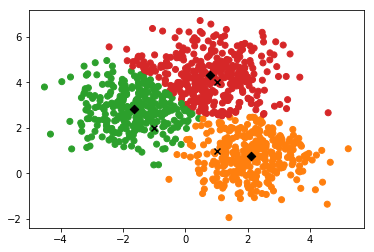

In [7]:
# Calculate the coordinates of the new centroid from cluster 1
x_new_centroid1 = df1[df1['Cluster1']=='C1']['feature_1'].mean()
y_new_centroid1 = df1[df1['Cluster1']=='C1']['feature_2'].mean()

# Calculate the coordinates of the new centroid from cluster 2
x_new_centroid2 = df1[df1['Cluster1']=='C2']['feature_1'].mean()
y_new_centroid2 = df1[df1['Cluster1']=='C2']['feature_2'].mean()

# Calculate the coordinates of the new centroid from cluster 3
x_new_centroid3 = df1[df1['Cluster1']=='C3']['feature_1'].mean()
y_new_centroid3 = df1[df1['Cluster1']=='C3']['feature_2'].mean()

new1 = pd.DataFrame([[x_new_centroid1,y_new_centroid1],[x_new_centroid2,y_new_centroid2],[x_new_centroid3,y_new_centroid3]], 
                   columns = ['feature_1','feature_2'])
plt.scatter(df1['feature_1'], df1['feature_2'], c=df1['Cluster1']);
plt.scatter(initial['feature_1'], initial['feature_2'], marker='x', c='black');
plt.scatter(new1['feature_1'], new1['feature_2'], marker='D', c='black');

C:\Users\Rachel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


     Object  feature_1  feature_2  c1_dist_1  c2_dist_1  c3_dist_1 Cluster1  \
0  Object 1  -0.807236   2.669463   2.460327   0.696663   2.244199       C2   
1  Object 2   1.926358   4.152430   3.285720   3.632703   0.938816       C3   
2  Object 3  -1.500166   3.101333   3.265950   1.209586   2.656771       C2   
3  Object 4  -1.109050   2.877864   2.823909   0.884611   2.388992       C2   
4  Object 5  -2.531227   1.919691   3.649026   1.533331   4.098445       C2   

   c1_dist_2  c2_dist_2  c3_dist_2 Cluster2  
0   3.469241   0.852101   2.289774       C2  
1   3.371485   3.817419   1.144899       C3  
2   4.285644   0.325774   2.590521       C2  
3   3.835862   0.542644   2.379074       C2  
4   4.773903   1.254983   4.092563       C2  


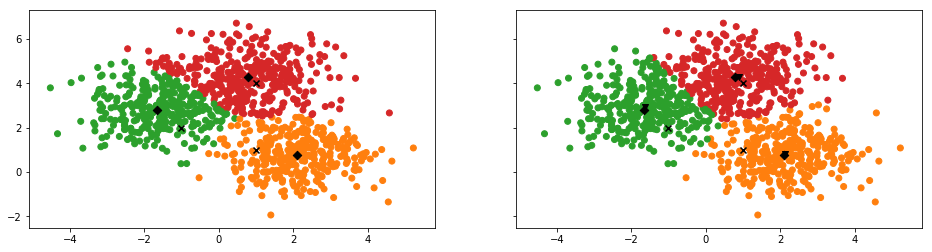

In [8]:
# Rename the new centers as the initial centers and repeat
c1 = (x_new_centroid1, y_new_centroid1)
c2 = (x_new_centroid2, y_new_centroid2)
c3 = (x_new_centroid3, y_new_centroid3)

df1['c1_dist_2'] = calculate_distance(c1, df1.feature_1, df1.feature_2)
df1['c2_dist_2'] = calculate_distance(c2, df1.feature_1, df1.feature_2)
df1['c3_dist_2'] = calculate_distance(c3, df1.feature_1, df1.feature_2)

df1['Cluster2'] = df1[['c1_dist_2', 'c2_dist_2', 'c3_dist_2']].apply(np.argmin, axis =1)
df1['Cluster2'] = df1['Cluster2'].map({'c1_dist_2': 'C1', 'c2_dist_2': 'C2', 'c3_dist_2': 'C3'})
print(df1.head())

# Calculate the coordinates of the new centroid from cluster 1
x_new_centroid1 = df1[df1['Cluster2']=='C1']['feature_1'].mean()
y_new_centroid1 = df1[df1['Cluster2']=='C1']['feature_2'].mean()

# Calculate the coordinates of the new centroid from cluster 2
x_new_centroid2 = df1[df1['Cluster2']=='C2']['feature_1'].mean()
y_new_centroid2 = df1[df1['Cluster2']=='C2']['feature_2'].mean()

# Calculate the coordinates of the new centroid from cluster 3
x_new_centroid3 = df1[df1['Cluster2']=='C3']['feature_1'].mean()
y_new_centroid3 = df1[df1['Cluster2']=='C3']['feature_2'].mean()

new2 = pd.DataFrame([[x_new_centroid1,y_new_centroid1],[x_new_centroid2,y_new_centroid2],[x_new_centroid3,y_new_centroid3]], 
                   columns = ['feature_1','feature_2'])


fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(16, 4), sharex=True, sharey=True)
ax1.scatter(df1['feature_1'], df1['feature_2'], c=df1['Cluster1'])
ax1.scatter(initial['feature_1'], initial['feature_2'], marker='x', c='black')
ax1.scatter(new1['feature_1'], new1['feature_2'], marker='D', c='black')
ax2.scatter(df1['feature_1'], df1['feature_2'], c=df1['Cluster2'])
ax2.scatter(initial['feature_1'], initial['feature_2'], marker='x', c='black')
ax2.scatter(new1['feature_1'], new1['feature_2'], marker='D', c='black')
ax2.scatter(new2['feature_1'], new2['feature_2'], marker='v', c='black')

### Task 2: Oh wait.... `sci-kit learn` has a *k*-means function to make things easier!!
1. Because `sci-kit learn` has a built in function for clustering so you no long have to do this by hand! For this, you will need to import the following: 
````python
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
````
2. Import the `sample_5features.csv` file and visualize the data using `plt.plot` used in the previous tutorials. Since this dataset has more than 2 features, you may want to use a scatterplot matrix that you've used previously. Does this dataset appear to have a clustering structure? If so, how many clusters do you think are in the dataset?
3. Prior to using the `KMeans` function, you need to clean the data to only include the "features" columns. Wait...how will the computer calculate a Euclidean distance with a dataset that has 5 features?
4. First, we need to reduce our dimensions using whats called Principle Component Analysis (PCA). Here, use the `PCA.fit_transform` function to transform the data to 2 dimensions. Use [this](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform) as a resource. 
5. Now that we have the data in 2-D, we can easily perform a *k*-means clustering on the reduced data. Use [this](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) resource to perform a *k*-means, predict the clusters, find the cluster centers, and plot the results. Below is a plotting definition to help you:
````python
def kmeans_plot(data,label,centers):
    
    x_min, x_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    y_min, y_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    
    plt.scatter(data[:, 1], data[:, 0], c=label, cmap = 'viridis')
    plt.scatter(centers[:, 1], centers[:, 0], marker='x', c = 'k')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    title = "KMeans Clustering of a PCA transformed dataset with "+str(len(centers))+" clusters"
    plt.title(title)
    plt.show()
````
6. What happens if you change the number of clusters? Can you justify the optimal number of clusters in the dataset?

In [9]:
np.random.seed(123)
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

In [10]:
df2 = pd.read_csv('data/sample_5features.csv')
df2.head()

,Object,feature_1,feature_2,feature_3,feature_4,feature_5
0,Object 1,3.185427,2.274136,0.850604,2.740480,-0.605275
1,Object 2,2.093339,-2.055174,4.175403,7.881585,-1.837638
2,Object 3,5.006976,-0.430366,3.917950,10.389596,-14.011839
3,Object 4,0.284307,3.376595,3.018230,-2.183930,-1.400380
4,Object 5,1.891101,2.374563,0.490009,0.676885,-3.636161


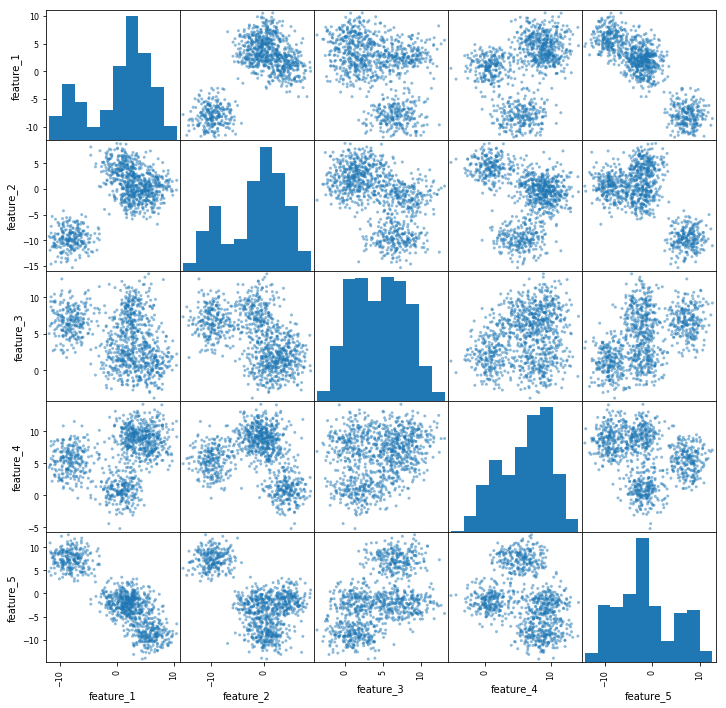

In [11]:
axes = pd.plotting.scatter_matrix(df2, figsize=(12, 12))

In [12]:
data = df2.drop('Object', axis = 1)
reduced_data = PCA(n_components=2).fit_transform(data)

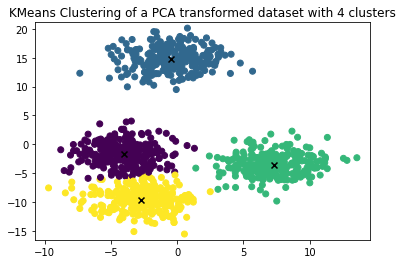

In [13]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(reduced_data)
clust_labels = kmeans.predict(reduced_data)
cent = kmeans.cluster_centers_

def kmeans_plot(df,labels,centers):
    
    x_min, x_max = df[:, 1].min() - 1, df[:, 1].max() + 1
    y_min, y_max = df[:, 0].min() - 1, df[:, 0].max() + 1
    
    plt.scatter(df[:, 1], df[:, 0], c=labels, cmap = 'viridis')
    plt.scatter(centers[:, 1], centers[:, 0], marker='x', c = 'k')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    title = "KMeans Clustering of a PCA transformed dataset with "+str(len(centers))+" clusters"
    plt.title(title)
    plt.show()
    
kmeans_plot(reduced_data,clust_labels,cent)

## Hierarchical Clustering
A big limitation to *k*-means clustering is that the researcher has to provide the algorithm with the number of clusters. But what if the data doesn't show a clear cluster structure and therefore, the researcher has no idea how many clusters would make sense? Hierarchical clustering is a bottom-up approach that seeks to build a hierarchy of clusters. Hierarchical clustering produces what's called a dendrogram which can be analyzed in order to decide how many clusters exist in the dataset. Remember the overall goal of clustering is to split up the data so that points within a single cluster are very similar and points in different clusters are different. A dendrogram plots the distances between two points and so looking for when the distance between clusters in the greatest can determine how many clusters exist in the dataset. Let's explore...

### Task 3: Perform the Hierarchical Clustering using `scipy.cluster.hierarchy`
1. Continue to use the `sample_5features.csv` dataset. For hierarchical clustering, you will need to import the following: 
````python
import scipy.cluster.hierarchy as shc
````
2. Perform a hierarchical clustering:
 - First, you will need to decide what "linkage" you will use. For our purposes, let's us "Ward" method ([`shc.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)). 
 - Next, visualize the data ([`shc.dendrogram`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html)).
3. Add a horizontal line at y = 300. How many clusters are there?
4. Add a horizontal line at y = 175. How many clusters are there?
5. Add a horizontal line at y = 125. How many clusters are there?
6. Does the hierarchical clustering analysis change the decisions you made in the prior *k*-means analysis you did earlier?

In [14]:
import scipy.cluster.hierarchy as shc

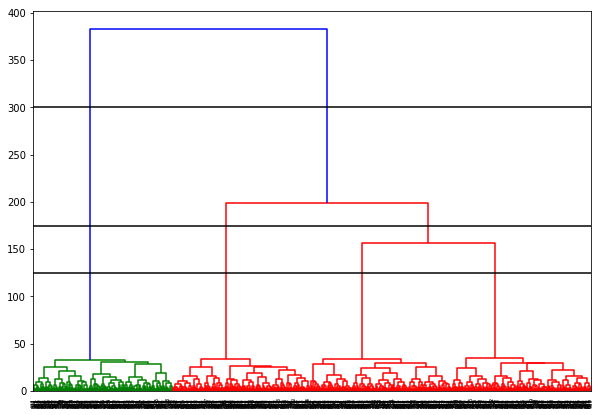

In [15]:
plt.figure(figsize=(10, 7))  
plt.axhline(y=300, color='black')
plt.axhline(y=175, color='black')
plt.axhline(y=125, color='black')

dend = shc.dendrogram(shc.linkage(data, method='ward')) 

## Challenges

After you've mastered the above two clustering algorithms, you should be able to explore the practical usage of clustering in more detail.
1. Using the `sample_challenge` dataset, how does reducing the number of total features impact the model fit in the outcome variable provided.
2. Using `sci-kit learn`, how does the level of noise in the data impact how "easy" clustering is? Hint: You will need to use the following to produce your own clustering dataset:
````python
from sklearn.datasets.samples_generator import make_blobs
````

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
dfc1 = pd.read_csv('data/sample_30features.csv')
dfc1.head() 

,feature_1,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,...,feature_29,feature_3,feature_30,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,predict_this
0,5.757072,-5.931159,3.332827,7.135457,7.737662,-0.763621,7.209686,5.051219,2.033389,-8.269967,...,-2.029543,3.444151,-3.403443,-1.172655,8.172414,-2.044542,1.987646,1.840221,1.314198,0
1,-2.083018,-4.037854,-4.315736,-5.926890,-7.151289,8.280328,10.445901,-2.719204,-1.427790,9.644736,...,-8.251322,-5.294265,9.423285,-1.750001,-3.767752,9.212673,-3.373071,5.362225,5.760396,1
2,10.099541,-4.441801,3.922276,10.074034,4.250730,-1.264427,7.599514,2.240898,7.348311,-8.620713,...,-0.294146,5.456715,-4.622921,1.618886,6.743150,-2.590732,3.315255,3.123658,3.894160,1
3,-1.582903,-6.733966,-5.083184,-3.825486,-6.570014,9.115893,10.175685,3.021160,-4.213379,3.654232,...,-6.009391,-6.558654,10.074541,-2.062663,1.935268,11.879705,-0.132910,6.286275,5.993071,0
4,7.683803,-5.141968,3.589160,9.356984,4.834267,-0.190603,7.184949,4.480846,0.316026,-5.622906,...,-1.529260,5.596385,-8.980173,-0.421421,9.256635,-3.182472,0.810769,1.514137,2.334854,1


In [18]:
train_x, test_x, train_y, test_y = train_test_split(dfc1[dfc1.columns[0:29]], dfc1[dfc1.columns[30]])
LR = LogisticRegression()
LR.fit(train_x, train_y)
LR.score(test_x, test_y)

0.5136

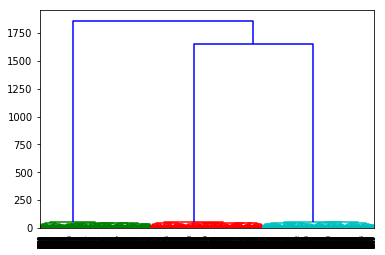

In [19]:
dend = shc.dendrogram(shc.linkage(dfc1, method='ward')) 

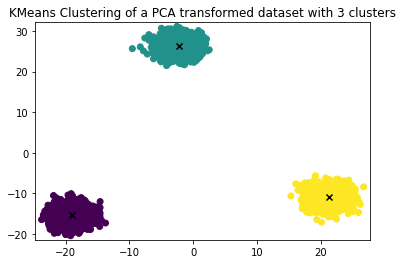

In [20]:
reduced_data = PCA(n_components=2).fit_transform(dfc1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(reduced_data)
clust_labels = kmeans.predict(reduced_data)
cent = kmeans.cluster_centers_

def kmeans_plot(df,labels,centers):
    
    x_min, x_max = df[:, 1].min() - 1, df[:, 1].max() + 1
    y_min, y_max = df[:, 0].min() - 1, df[:, 0].max() + 1
    
    plt.scatter(df[:, 1], df[:, 0], c=labels, cmap = 'viridis')
    plt.scatter(centers[:, 1], centers[:, 0], marker='x', c = 'k')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    title = "KMeans Clustering of a PCA transformed dataset with "+str(len(centers))+" clusters"
    plt.title(title)
    plt.show()
    
kmeans_plot(reduced_data,clust_labels,cent)

In [21]:
dfc1['Clusters'] = clust_labels
dummies = pd.get_dummies(dfc1["Clusters"])
train_x, test_x, train_y, test_y = train_test_split(dummies[dummies.columns[0:]], dfc1[dfc1.columns[30]])
#train_x = np.array(train_x)
#train_y = np.array(train_y)
#test_x = np.array(test_x)
#test_y = np.array(test_y)

LR.fit(train_x, train_y)
LR.score(test_x, test_y)

0.5272

In [22]:
# Imports
from sklearn.datasets.samples_generator import make_blobs

# Generate 2D data points
X, _ = make_blobs(n_samples=100, centers=3, n_features=2,
                 cluster_std=0.2,  random_state=0)
Y, _ = make_blobs(n_samples=100, centers=3, n_features=2,
                 cluster_std=1.4,  random_state=0)
Z, _ = make_blobs(n_samples=100, centers=3, n_features=2,
                 cluster_std=3.0,  random_state=0)

# Generate indicators for the data points
obj_names = []
for i in range(1, 101):
    obj = "Object " + str(i)
    obj_names.append(obj)

# Create a pandas DataFrame with the names and (x, y) coordinates
dfc1_small = pd.DataFrame({
    'feature_1': X[:, 0],
    'feature_2': X[:, 1],
})

dfc1_medium = pd.DataFrame({
    'feature_1': Y[:, 0],
    'feature_2': Y[:, 1],
})

dfc1_large = pd.DataFrame({
    'feature_1': Z[:, 0],
    'feature_2': Z[:, 1],
})


In [23]:
def doKmeans(X, ncluster):
    model = KMeans(ncluster)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    
    return clust_labels, cent

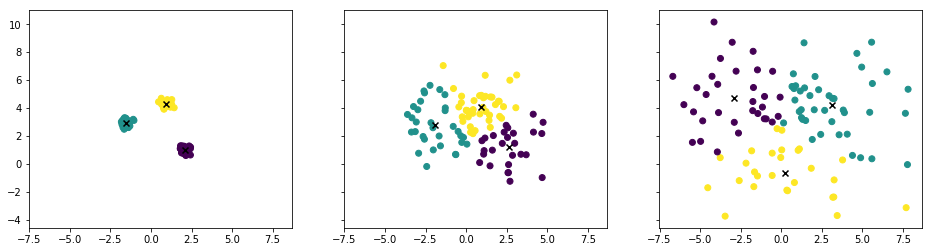

In [24]:
dfc1_small['label'], center_small = doKmeans(dfc1_small, 3)
dfc1_medium['label'], center_medium = doKmeans(dfc1_medium , 3)
dfc1_large['label'], center_large = doKmeans(dfc1_large, 3)

center_small = pd.DataFrame({'feature_1':center_small[:,0],'feature_2':center_small[:,1]})
center_medium = pd.DataFrame({'feature_1':center_medium[:,0],'feature_2':center_medium[:,1]})
center_large = pd.DataFrame({'feature_1':center_large[:,0],'feature_2':center_large[:,1]})

fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(16, 4), sharex=True, sharey=True)
ax1.scatter(dfc1_small['feature_1'], dfc1_small['feature_2'], c=dfc1_small['label'])
ax1.scatter(center_small['feature_1'], center_small['feature_2'], marker='x', c='black')
ax2.scatter(dfc1_medium['feature_1'], dfc1_medium['feature_2'], c=dfc1_medium['label'])
ax2.scatter(center_medium['feature_1'], center_medium['feature_2'], marker='x', c='black')
ax3.scatter(dfc1_large['feature_1'], dfc1_large['feature_2'], c=dfc1_large['label'])
ax3.scatter(center_large['feature_1'], center_large['feature_2'], marker='x', c='black')
